In [14]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential, load_model
from keras.layers import LSTM, Dense, Dropout
from sklearn.model_selection import train_test_split

In [15]:
# Load datasets
body_falling = pd.read_csv("./data/data_falling_merged.csv")
body_sitting = pd.read_csv("./data/data_sitting_merged.csv")
body_standing = pd.read_csv("./data/data_standing_merged.csv")


In [16]:
# Step 1: Data Quality Check
def check_missing_values(df, name):
    missing_values = df.isnull().sum().sum()
    print(f"Missing values in {name}: {missing_values}")
    if missing_values > 0:
        df.fillna(method='ffill', inplace=True)  # Forward fill as a simple imputation strategy
        print(f"Missing values in {name} after imputation: {df.isnull().sum().sum()}")

check_missing_values(body_falling, "Falling")
check_missing_values(body_sitting, "Sitting")
check_missing_values(body_standing, "Standing")

Missing values in Falling: 0
Missing values in Sitting: 0
Missing values in Standing: 0


In [20]:
# Step 3: Preparing Data for Training
X = []
y = []
no_of_timesteps = 10

def process_data(df, label):
    dataset = df.iloc[:, 1:].values
    n_sample = len(dataset)
    for i in range(no_of_timesteps, n_sample):
        X.append(dataset[i-no_of_timesteps:i, :])
        y.append(label)

process_data(body_falling, 0)  # Falling
process_data(body_sitting, 1)  # Sitting
process_data(body_standing, 2)  # Standing

X, y = np.array(X), np.array(y)
print("Dataset Shape:", X.shape, y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

Dataset Shape: (1560, 10, 131) (1560,)


In [21]:
model  = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X.shape[1], X.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=3, activation="softmax"))
model.compile(optimizer="adam", metrics=['accuracy'], loss="sparse_categorical_crossentropy")

C:\Users\Admin\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
# Step 4: Model Training
model_path = "./model.h5"
if os.path.exists(model_path):
    model = load_model(model_path)
    print("Loaded existing model.")
else:
    model  = Sequential()
    model.add(LSTM(units=50, return_sequences=True, input_shape=(X.shape[1], X.shape[2])))
    model.add(Dropout(0.2))
    model.add(LSTM(units=50, return_sequences=True))
    model.add(Dropout(0.2))
    model.add(LSTM(units=50, return_sequences=True))
    model.add(Dropout(0.2))
    model.add(LSTM(units=50))
    model.add(Dropout(0.2))
    model.add(Dense(units=3, activation="softmax"))
    model.compile(optimizer="adam", metrics=['accuracy'], loss="sparse_categorical_crossentropy")
    print("Created new model.")


Created new model.


C:\Users\Admin\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [22]:

# Train model
history = model.fit(X_train, y_train, epochs=16, batch_size=32, validation_data=(X_test, y_test))
model.save("model.h5")


Epoch 1/16
39/39 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.7038 - loss: 0.8056 - val_accuracy: 0.9551 - val_loss: 0.1431
Epoch 2/16
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9774 - loss: 0.0665 - val_accuracy: 0.9712 - val_loss: 0.0769
Epoch 3/16
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9530 - loss: 0.1381 - val_accuracy: 0.9808 - val_loss: 0.0526
Epoch 4/16
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9835 - loss: 0.0416 - val_accuracy: 0.9968 - val_loss: 0.0220
Epoch 5/16
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9806 - loss: 0.0447 - val_accuracy: 0.9872 - val_loss: 0.0234
Epoch 6/16
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9896 - loss: 0.0333 - val_accuracy: 0.9872 - val_loss: 0.0389
Epoch 7/16
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9980 - loss: 0.0073 - val_accuracy: 0.9936 - val_loss: 0.0212
Epoch 8/16
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9950 - loss: 0.0106 - val_accuracy: 0.9872 - val_loss

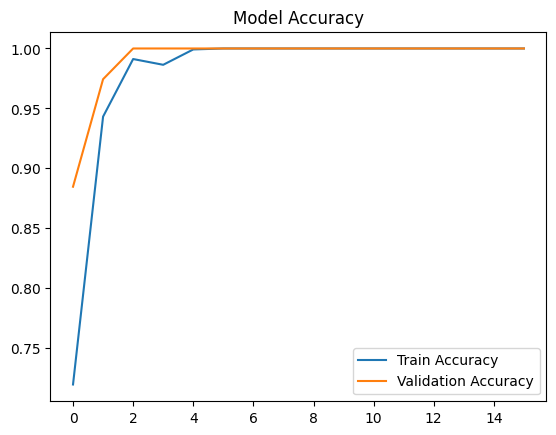

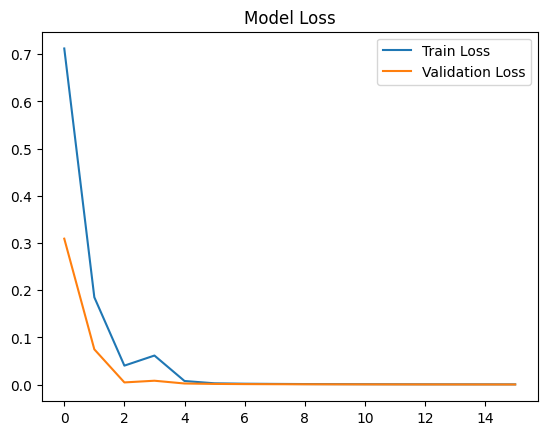

In [12]:
# Plot Training Results
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title("Model Accuracy")
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title("Model Loss")
plt.show()


In [24]:
import numpy as np
import pandas as pd
from keras.models import load_model

In [25]:
# Load trained model
model = load_model("./model.h5")

In [45]:
# Đọc dữ liệu từ tệp CSV
csv_file = "data/data_falling_7.csv"  # Đổi thành đường dẫn file của bạn
df = pd.read_csv(csv_file)



In [46]:
# Chuyển đổi dữ liệu thành dạng numpy array
data = df.iloc[:, 1:].values  # Giả sử cột đầu tiên là timestamp hoặc ID, bỏ qua nó
no_of_timesteps = 10
num_features = 131

# Kiểm tra số lượng dữ liệu
if data.shape[1] != num_features:
    raise ValueError(f"Expected {num_features} features, but got {data.shape[1]}.")

# Đảm bảo có đủ 10 khung hình (nếu không, cần xử lý bổ sung)
if len(data) < no_of_timesteps:
    raise ValueError(f"Not enough data: need at least {no_of_timesteps} frames.")

# Lấy 10 khung hình cuối cùng
sequence = data[-no_of_timesteps:, :]

# Định dạng lại dữ liệu để phù hợp với đầu vào của model
sequence = np.expand_dims(sequence, axis=0)  # Shape sẽ thành (1, 10, 131)



In [47]:
# **Bước 2: Dự đoán với model**
prediction = model.predict(sequence)
label = np.argmax(prediction)

# **Bước 3: Hiển thị kết quả**
labels = ["Falling", "Sitting", "Standing"]
print(f"Predicted Label: {labels[label]}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Predicted Label: Falling
